In [39]:
import pandas as pd

# Formatando os números
pd.options.display.float_format = '{:,.2f}'.format

In [40]:
base = pd.read_excel("dataset/dados-instagram.xlsx")

In [41]:
base.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [42]:
# Tirando a coluna visualizações
base = base.drop("Visualizações", axis=1)
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [43]:
# Contando os valores que aparecem na coluna Carrossel
base.Carrossel.value_counts()

Carrossel
S    8
Name: count, dtype: int64

In [44]:
# Filtrando os valores em que o Carrossel é nulo
base.loc[base.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [45]:
# Atribuindo valor N para essa coluna
base.loc[base.Carrossel.isnull(), "Carrossel"] = "N"

In [46]:
# Agrupando por Tags
base.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas                 17,975.00
Datas comemorativas/Promoções       29,084.00
Dicas de como usar/Novos Produtos    5,703.50
Dicas de como usar/Produtos          7,586.67
Influenciadores                     15,197.29
Loja                                 2,832.50
Loja/Produtos                        2,930.00
Novos Produtos                      11,619.57
Produtos                             5,666.92
Promoções                           26,645.50
Trends                              22,400.67
Trends/Produtos                     12,894.00
Name: Curtidas, dtype: float64

### Para conseguir analisar separadamente as tags, podemos dividir linhas com 2 tags em 2 linhas
- Para isso primeiro vamos usar o split para separar em uma lista com as tags
- Depois vamos usar o explode para transformar as listas com 2 tags em 2 linhas diferentes

### O split separa um texto em uma lista baseado em algum separador

In [47]:
# Transformando a coluna de Tags em uma lista de tags
base.Tags = base.Tags.str.split("/")
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437


### O explode vai separar uma coluna de um DataFrame em 1 linha para cada elemento da lista

- Tudo que estiver em lista será separado em 1 linha por elemento da lista
- Se não tiver na lista, o elemento será mantido
- Listas vazias vão ter o valor de NaN
- Para outras colunas elas irão repetir seus valores
- Inclusive o índice também irá repetir

In [48]:
# Separando a colina Tag em  1 linha para cada elemento da lista
base = base.explode("Tags")
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164


## Fazendo a mesma análise da média por tag

#### Aviso importante: muito cuidado pois as outras colunas serão duplicadas, então não podemos fazer o mesmo cálculo de média que estávamos fazendo

- No arquivo anterior

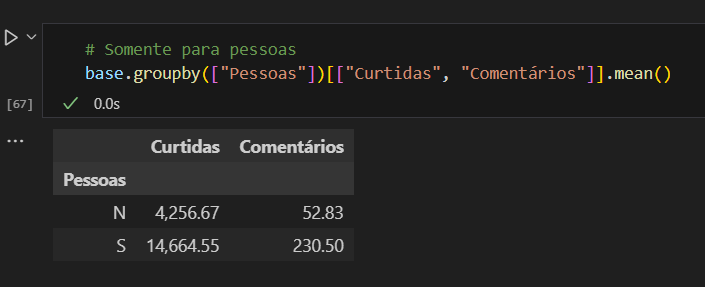

- O valor mudou porque quando se da o explode ele separa a lista de elementos em uma nova linha
- Então não é valido fazer essa análise para a colunas Pessoas, apenas para a coluna Tags á qual foi realizado a função explode.

In [49]:
# Repetindo o calculo da média para pessoas
# ANÁLISE NÃO VÁLIDA
base.groupby("Pessoas")["Curtidas"].mean()

Pessoas
N    4,154.62
S   14,100.57
Name: Curtidas, dtype: float64

In [50]:
# ANÁLISE VÁLIDA
base.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas   20,752.25
Dicas de como usar     6,833.40
Influenciadores       15,197.29
Loja                   2,865.00
Novos Produtos        10,304.89
Produtos               6,269.82
Promoções             27,458.33
Trends                20,024.00
Name: Curtidas, dtype: float64

In [51]:
# Ordenando por curtidas
base.groupby("Tags")[["Curtidas", "Comentários"]].mean().sort_values("Curtidas", ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


- Postagens de promoções são as que mais engajam
- Além de promoções, datas comemorativas e trends possuem um bom engajamento

#### E o que está sem tag?

In [52]:
# Filtrando valores sem tag
base[base.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,N,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,N,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,N,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,N,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,N,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737


In [53]:
base.loc[base.Tags.isnull(),"Tags"]

11    NaN
19    NaN
29    NaN
38    NaN
41    NaN
43    NaN
49    NaN
50    NaN
Name: Tags, dtype: object

In [54]:
base.loc[base.Tags.isnull(),"Tags"] = "Sem tag"

In [55]:
# Mostrando novamente a tabela de curtidas por tag
base.groupby("Tags")[["Curtidas", "Comentários"]].mean().sort_values("Curtidas", ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Sem tag,"15,347.88",207.75
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


In [58]:
# Podemos voltar como NaN caso a gente queira somente ignorar esses valores conforme orientado
import numpy as np

base.loc[base.Tags == "Sem tag", "Tags"] = np.nan

In [59]:
# E voltamos com as colunas com valores nulos
base[base.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,N,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,N,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,N,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,N,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,N,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737


In [60]:
# E essas linhas novamente podem ser consideradas na agrefação
base.groupby("Tags")[["Curtidas", "Comentários"]].mean().sort_values("Curtidas", ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67
